In [746]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [747]:
n = 1000
it = 1000
k_bound = 160
theta = 1.0

In [748]:
def g(x, k):
    return x ** k

In [749]:
def make_uniform():
    return np.random.uniform(0.0, theta, n)
def estimate_uniform(k, mk):
    return ((k + 1) * mk) ** (1 / k)

In [750]:
def make_exp():
    return np.random.exponential(1, n)
def estimate_exp(k, mk):
    return (mk / math.factorial(k)) ** (1 / k)

In [751]:
def estimated_g_expected(k, make_value, estimate):
    mk = (1 / n) * sum(map(lambda x: g(x, k), make_value()))
    return estimate(k, mk)

In [752]:
def make_iter_estimated_g_expected(k, make_value, estimate):
    arr = []
    for i in range(it):
        arr.append(estimated_g_expected(k, make_value, estimate))
    return arr
def make_sd(k, make_value, estimate):
    evals = make_iter_estimated_g_expected(k, make_value, estimate)
    return math.sqrt((1 / n) * sum(map(lambda x: (x - theta) ** 2, evals)))

In [753]:
%matplotlib inline

In [754]:
xx = np.linspace(1, k_bound, k_bound).astype(int)
uni_y = list(map(lambda k: make_sd(k, make_uniform, estimate_uniform), xx))
exp_y = list(map(lambda k: make_sd(k, make_exp, estimate_exp), xx))

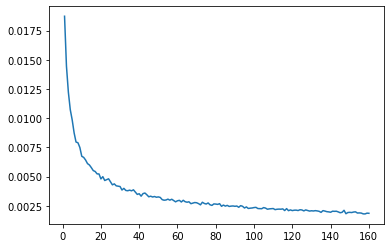

In [755]:
plt.plot(xx, uni_y)

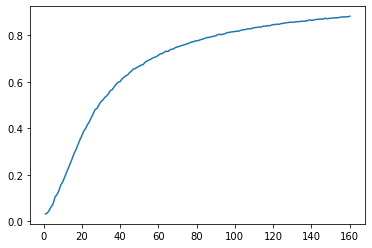

In [756]:
plt.plot(xx, exp_y)